# Boom Bike ML case study

### Importing libraries

In [587]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm

warnings.filterwarnings('ignore')

### Data Cleaning

In [588]:
df = pd.read_csv('/content/bike.csv')   # importing Csv file
df.head()   # displaying top 5 rows

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [589]:
df = df.drop(['casual', 'registered','dteday','instant'], axis=1)  # deleting casual and registered columns

### Data Handling


In [590]:
df.info()  # checking if there is any null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [591]:
# giving names to season column
season_mapping = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}
df.season = df.season.map(season_mapping)

In [592]:
# giving names to month columns
month_mapping = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

df['mnth'] = df['mnth'].map(month_mapping)


# Now Month and season are converted into catergorical string data which will be useful in further analysis

In [593]:
weekday_mapping = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
}

df['weekday'] = df['weekday'].map(weekday_mapping)

In [594]:
year_mapping = {
    0: '2018',
    1: '2019'
}

df['yr'] = df['yr'].map(year_mapping)

### Handline Outliers

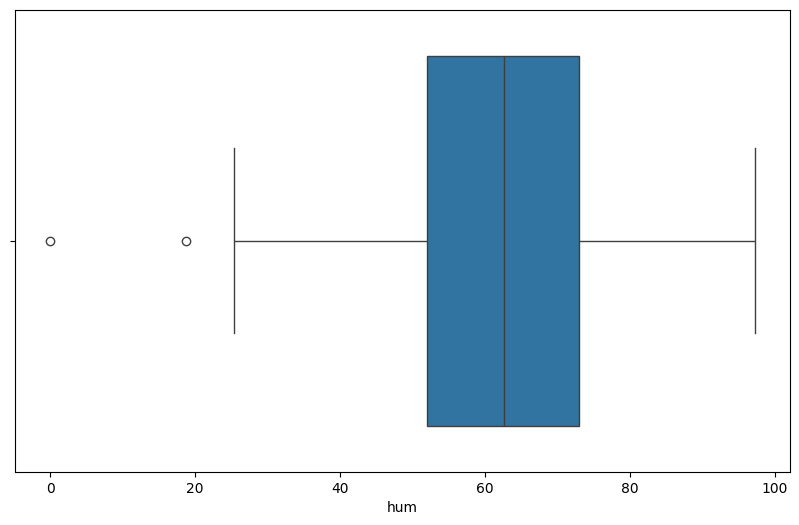

In [595]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='hum', data=df)
plt.show()


---
* we are removing outlier who are having humitdy value greater than 20.
---

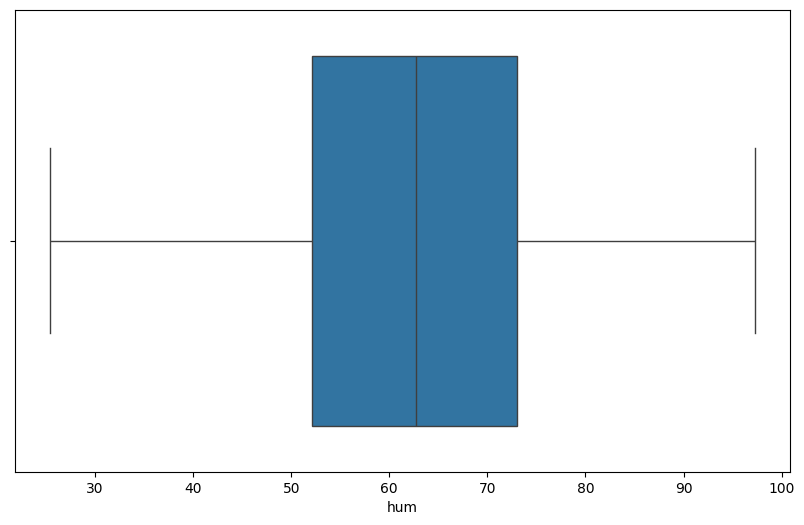

In [596]:

df= df[df.hum > 20]
plt.figure(figsize=(10, 6))
sns.boxplot(x='hum', data=df)
plt.show()

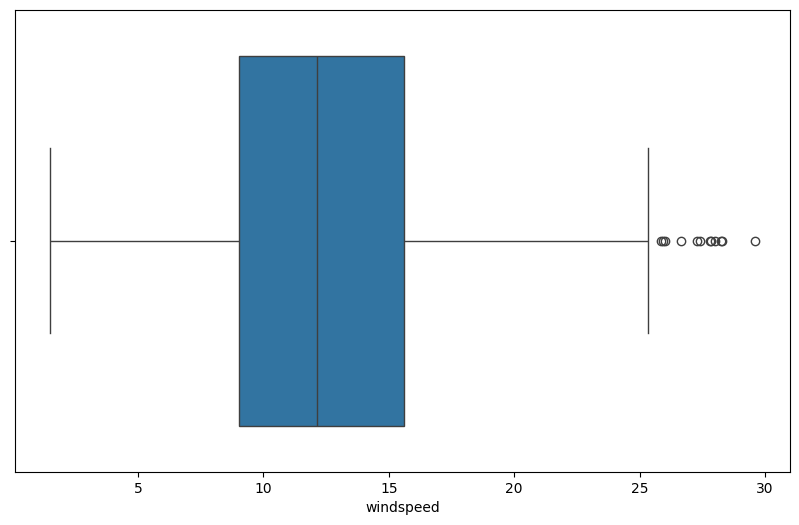

In [597]:
# plot scatter of windspeed to check whether it is having any outlier

df= df[df.hum > 20]
plt.figure(figsize=(10, 6))
sns.boxplot(x='windspeed', data=df)
plt.show()

---
* we are removing value who is having windspeed more than 25
---

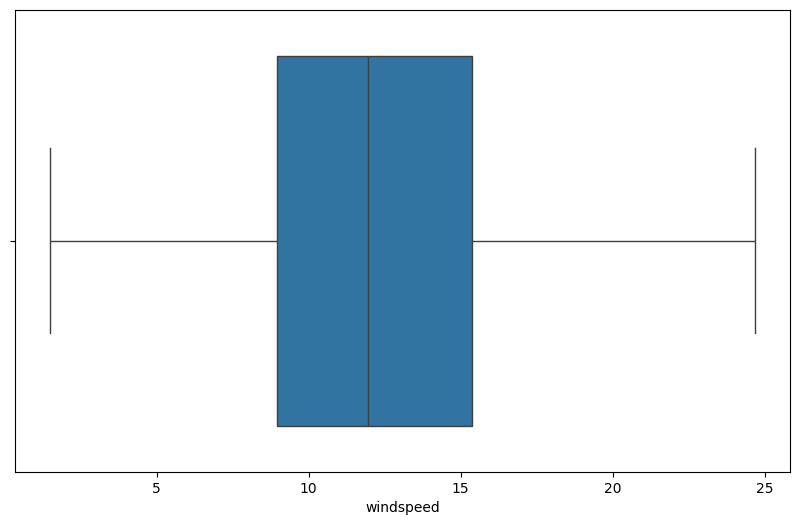

In [598]:
df = df[df.windspeed < 25]
plt.figure(figsize=(10, 6))
sns.boxplot(x='windspeed', data=df)
plt.show()

---
* Rest of data don't have any significant outliers.
---

---
### EDA


#### Univariate analysis

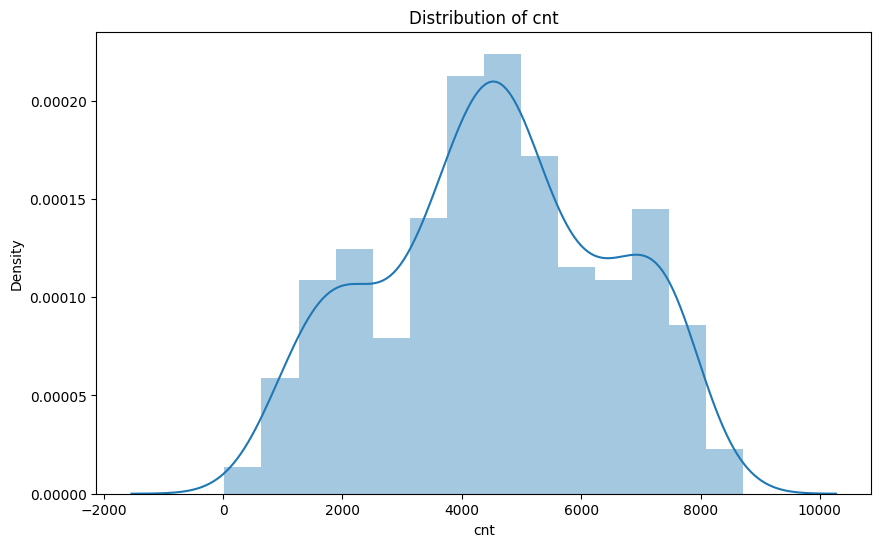

In [599]:
# plotting the distribution of cnt column
plt.figure(figsize=(10, 6))
sns.distplot(df['cnt'])
plt.title('Distribution of cnt')
plt.show()

---
- **Insight:** Company have more days with bike rent count reaching 4000
---

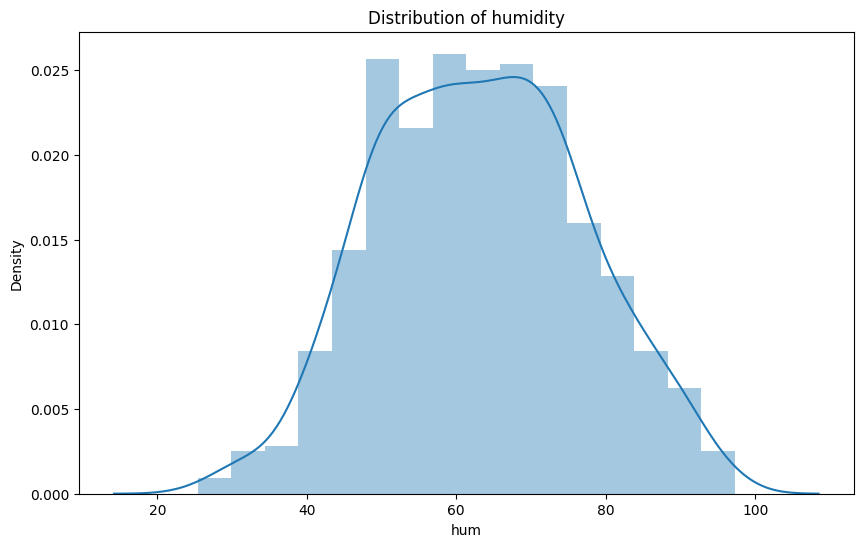

In [600]:
# plotting the distribution of hum column
plt.figure(figsize=(10, 6))
sns.distplot(df['hum'])
plt.title('Distribution of humidity')
plt.show()

---
- **Insight:** Location from which the data is taken, is having humidity majorly between range of **50-80**
---

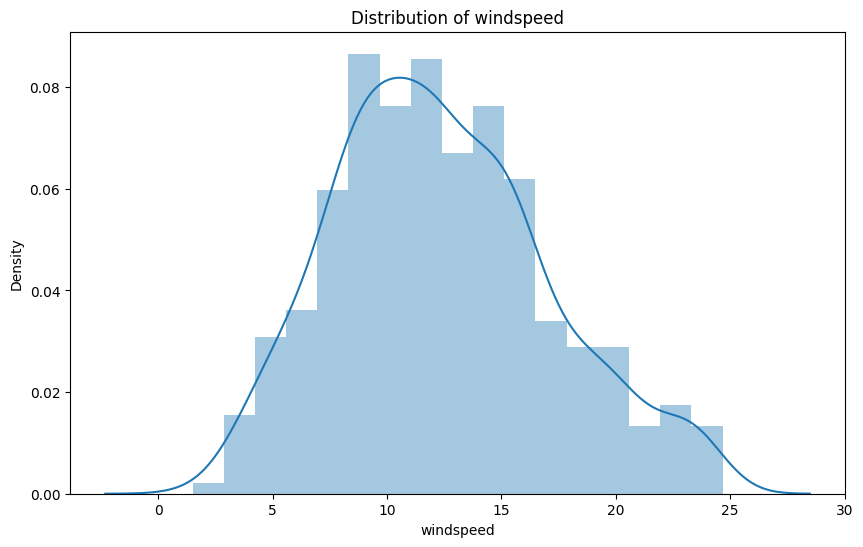

In [601]:
# plotting the distribution of windspeed column
plt.figure(figsize=(10, 6))
sns.distplot(df['windspeed'])
plt.title('Distribution of windspeed')
plt.show()

---
- **Insight:** Windspeed (in location of interest) is between the range of **7-15**
---

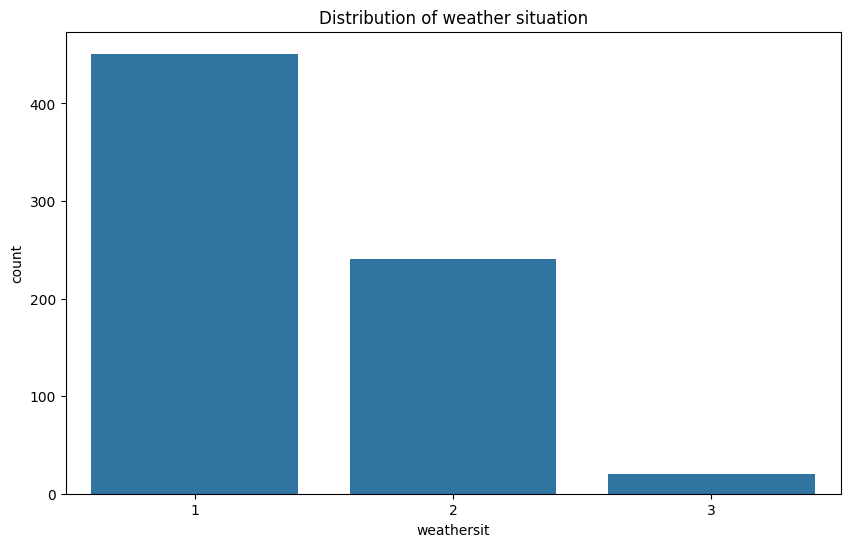

In [602]:
# plotting countplot for weathersit
plt.figure(figsize=(10,6))
sns.countplot(x='weathersit', data=df)
plt.title('Distribution of weather situation')

plt.show()

---
- **Insight:** Area from which data is collected is having most weather condition of Clear, Few clouds, Mist + cloud, broken clouds. Therefore bad climate conditions are rear in that particular locatioin. So company should focus on location which are having weather conditions like these in order to increase their revenue.
---

#### Bivariate Analysis

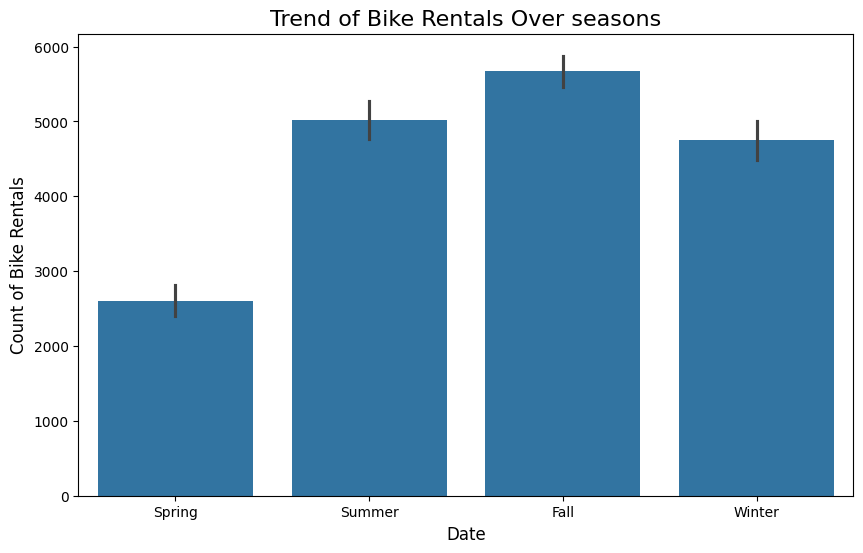

In [603]:
# Plotting bar plot over season

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='season', y='cnt')
plt.title('Trend of Bike Rentals Over seasons',fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Count of Bike Rentals', fontsize=12)
plt.show()

---
* **Insight:** During Fall season bike were rented more then any other season.
---





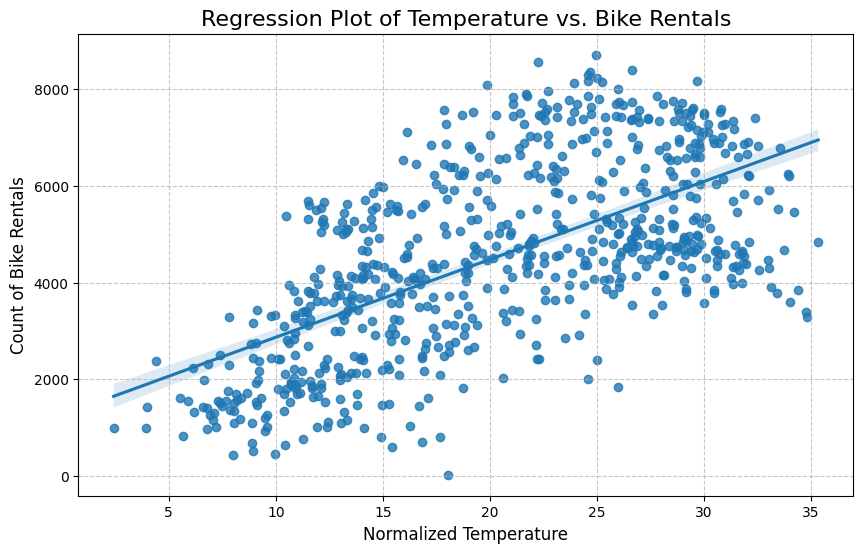

In [604]:
# plotting regression plot of temp over cnt

plt.figure(figsize=(10, 6))
sns.regplot(x='temp', y='cnt', data=df)
plt.title('Regression Plot of Temperature vs. Bike Rentals', fontsize=16)
plt.xlabel('Normalized Temperature', fontsize=12)
plt.ylabel('Count of Bike Rentals', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


---
* **Insights:** As we can see temperature have positive slope, so it does have linear relation with number of bike rented. Temperature range between **20-30** degree tends to have higher bike rent chnaces.
---

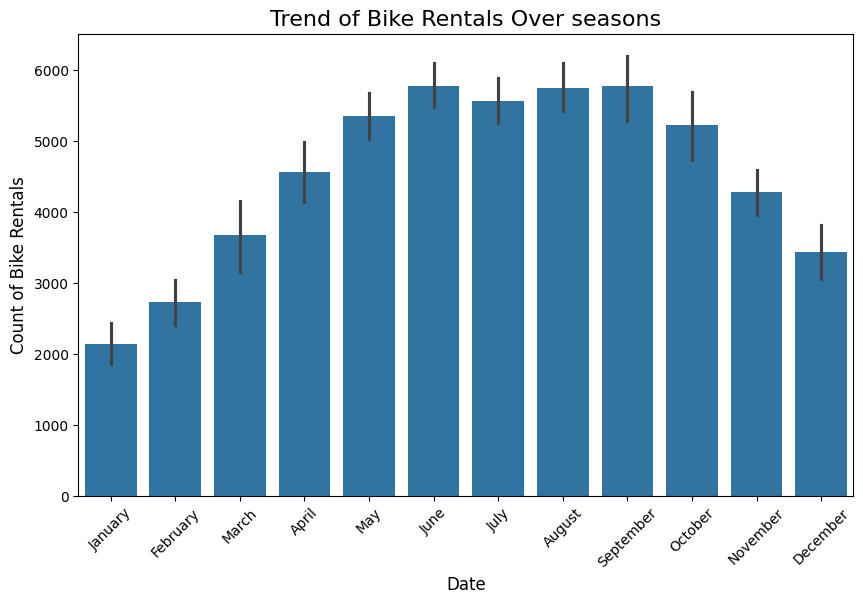

In [605]:
# Plotting bar plot of month over count

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='mnth', y='cnt')
plt.title('Trend of Bike Rentals Over seasons',fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Count of Bike Rentals', fontsize=12)
plt.xticks(rotation=45)
plt.show()

---
* **Insights:** As we seen above in seasons plot, month of fall i.e. June, july, August and September are having higher bike rent count
---

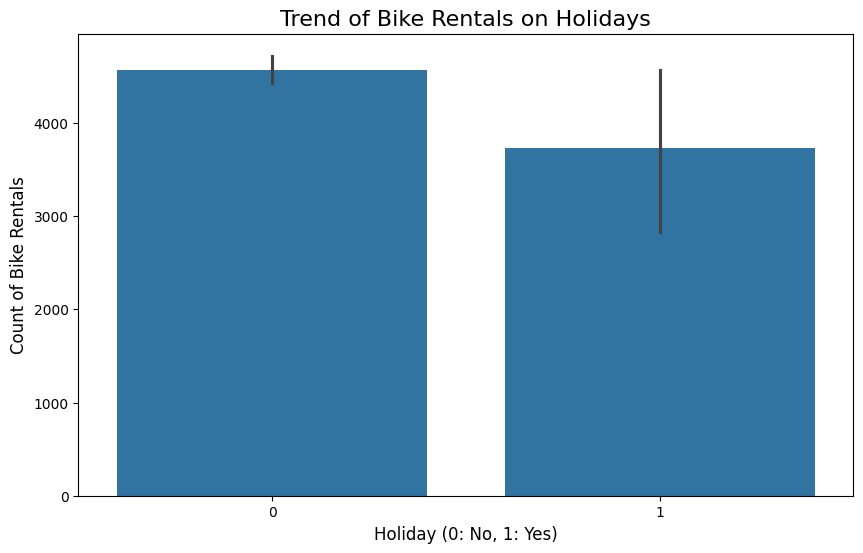

In [606]:
# now plotting bar plot of holiday over count
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='holiday', y='cnt')
plt.title('Trend of Bike Rentals on Holidays',fontsize=16)
plt.xlabel('Holiday (0: No, 1: Yes)', fontsize=12)
plt.ylabel('Count of Bike Rentals', fontsize=12)
plt.show()

---
* **Insights:** On holidays bike renting is less
---

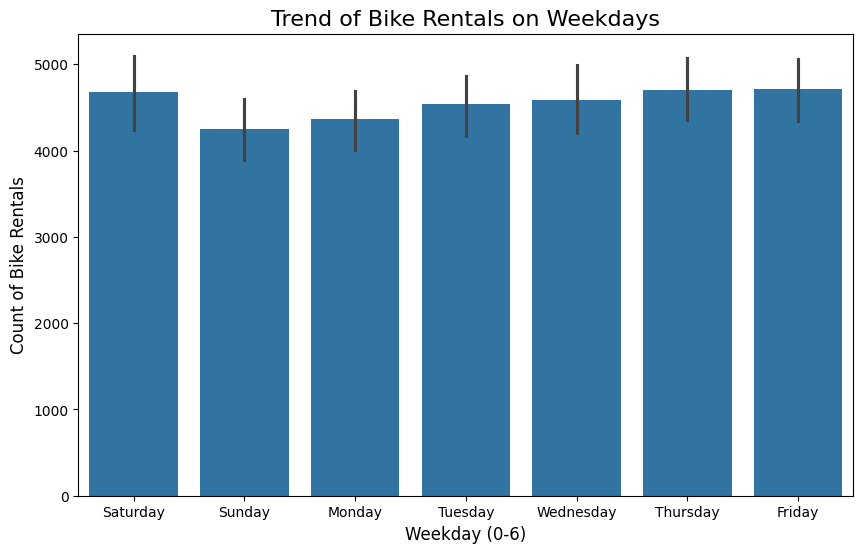

In [607]:
# plotting bike rental on weekdays
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='weekday', y='cnt')
plt.title('Trend of Bike Rentals on Weekdays',fontsize=16)
plt.xlabel('Weekday (0-6)', fontsize=12)
plt.ylabel('Count of Bike Rentals', fontsize=12)
plt.show()


 ---
 *  **Insights:** We can see increasing number of rent from to saturday and then we can we sudden drop on sunday(s).
 ---

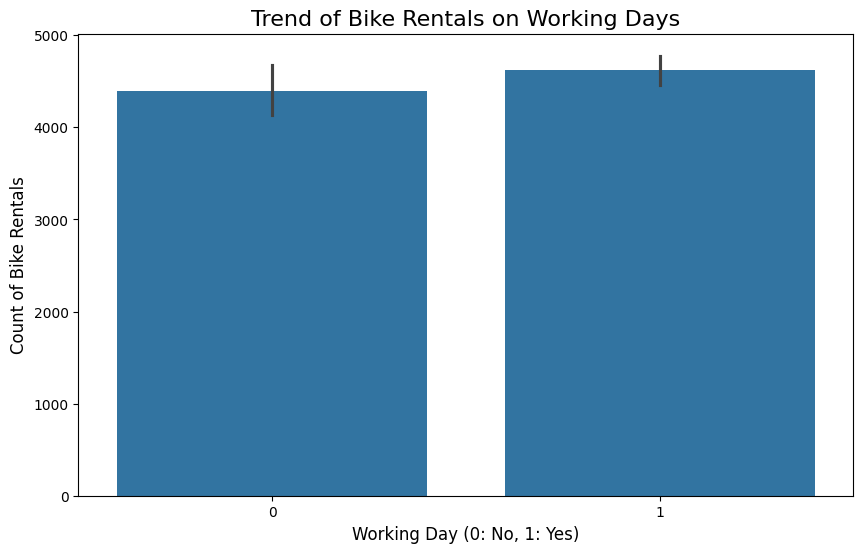

In [608]:
# ploting bar plot of bike rentals on working days
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='workingday', y='cnt')
plt.title('Trend of Bike Rentals on Working Days',fontsize=16)
plt.xlabel('Working Day (0: No, 1: Yes)', fontsize=12)
plt.ylabel('Count of Bike Rentals', fontsize=12)
plt.show()

---
* **Insight:** there is small difference between people taking bike rent on working days and non working days
---

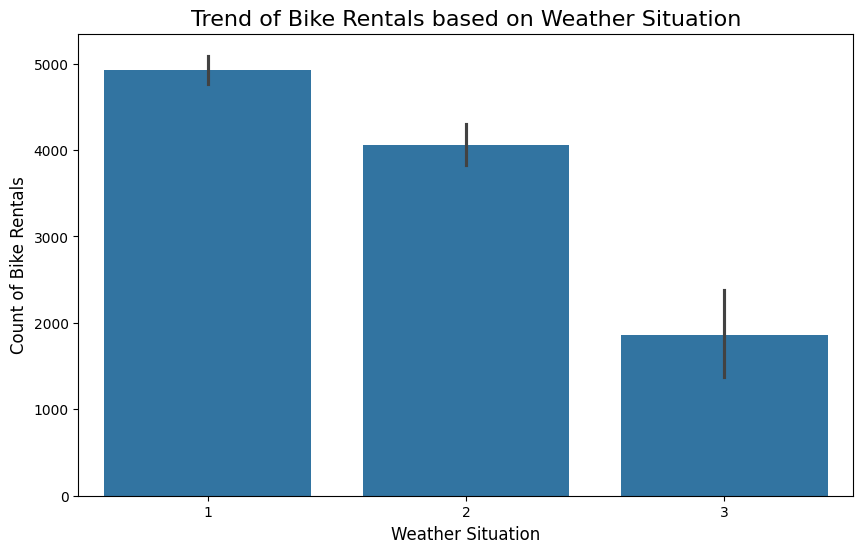

In [609]:
# bike rental on weather situation
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='weathersit', y='cnt')
plt.title('Trend of Bike Rentals based on Weather Situation', fontsize=16)
plt.xlabel('Weather Situation', fontsize=12)
plt.ylabel('Count of Bike Rentals', fontsize=12)
plt.show()

---
* **Insights:** weather situation on 1 category have more influence on bike renting
----


### Pre Processing of model

In [610]:
# importing libraries related to modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [611]:

# Creating dummy variables for categorical columns
df = pd.get_dummies(df, columns=['season', 'mnth', 'weekday', 'weathersit','yr'], drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 729
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   holiday            712 non-null    int64  
 1   workingday         712 non-null    int64  
 2   temp               712 non-null    float64
 3   atemp              712 non-null    float64
 4   hum                712 non-null    float64
 5   windspeed          712 non-null    float64
 6   cnt                712 non-null    int64  
 7   season_Spring      712 non-null    bool   
 8   season_Summer      712 non-null    bool   
 9   season_Winter      712 non-null    bool   
 10  mnth_August        712 non-null    bool   
 11  mnth_December      712 non-null    bool   
 12  mnth_February      712 non-null    bool   
 13  mnth_January       712 non-null    bool   
 14  mnth_July          712 non-null    bool   
 15  mnth_June          712 non-null    bool   
 16  mnth_March         712 non-null

In [612]:
X = df.drop(['cnt'], axis=1)
y = df['cnt']

# creating train test split with 70:30 proportion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

num_vars = ['temp','atemp', 'hum', 'windspeed']  # these are numeric values that require rescaling

scaler = MinMaxScaler()
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

X_train.head()

# we can see rescaled value of numeric columns


,holiday,workingday,temp,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,mnth_August,...,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_2,weathersit_3,yr_2019
43,0,0,0.320723,0.321653,0.292790,0.689729,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
42,0,0,0.203567,0.201994,0.417811,0.523390,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
76,0,1,0.599187,0.587981,0.390509,0.603355,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
172,0,1,0.840090,0.806955,0.653129,0.433433,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
463,0,1,0.535847,0.521862,0.091246,0.971163,False,True,False,False,...,False,True,False,False,False,False,False,False,False,True


### Feature Selection

#### Using RFE to select columns

In [614]:
# importing libraries need for building
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [615]:
lm = LinearRegression()

lm.fit(X_train, y_train)

# Change this line to use n_features_to_select
rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [616]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 14),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 8),
 ('season_Winter', True, 1),
 ('mnth_August', False, 9),
 ('mnth_December', True, 1),
 ('mnth_February', False, 12),
 ('mnth_January', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 10),
 ('mnth_March', True, 1),
 ('mnth_May', False, 5),
 ('mnth_November', True, 1),
 ('mnth_October', False, 7),
 ('mnth_September', True, 1),
 ('weekday_Monday', False, 6),
 ('weekday_Saturday', False, 2),
 ('weekday_Sunday', False, 4),
 ('weekday_Thursday', False, 15),
 ('weekday_Tuesday', False, 11),
 ('weekday_Wednesday', False, 13),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1),
 ('yr_2019', True, 1)]

In [617]:
col = X_train.columns[rfe.support_]
col

Index(['holiday', 'temp', 'hum', 'windspeed', 'season_Spring', 'season_Winter',
       'mnth_December', 'mnth_January', 'mnth_July', 'mnth_March',
       'mnth_November', 'mnth_September', 'weathersit_2', 'weathersit_3',
       'yr_2019'],
      dtype='object')

In [618]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'season_Summer', 'mnth_August', 'mnth_February',
       'mnth_June', 'mnth_May', 'mnth_October', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')

#### Inspection of selected columns

In [619]:
X_train_rfe = X_train[col]

# Convert bool columns to numeric (int or float)
X_train_rfe = X_train_rfe.astype({col: 'int64' for col in X_train_rfe.select_dtypes('bool').columns})

# Add a constant for the intercept
X_train_rfe = sm.add_constant(X_train_rfe)

# Ensure target (y_train) is numeric

# Fit the OLS model
lm = sm.OLS(y_train, X_train_rfe).fit()

# Display the summary
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     173.3
Date:                Wed, 04 Dec 2024   Prob (F-statistic):          3.97e-183
Time:                        10:39:29   Log-Likelihood:                -4017.2
No. Observations:                 498   AIC:                             8066.
Df Residuals:                     482   BIC:                             8134.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3072.0920    255.450     12.

---
- Now all variable are looking great. We will see VIF of every variable see if there is any multi collinearity
---

#### VIF

In [620]:
# removing Const variable before VIF
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [621]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculate VIF for each column
vif_data = pd.DataFrame()
vif_data["Variable"] = X_train_rfe.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif_data["VIF"] = round(vif_data["VIF"], 2)
vif_data.sort_values(by='VIF', ascending=False)
print(vif_data)

          Variable    VIF
0          holiday   1.05
1             temp  13.28
2              hum  14.71
3        windspeed   5.43
4    season_Spring   3.18
5    season_Winter   2.58
6    mnth_December   1.55
7     mnth_January   1.98
8        mnth_July   1.51
9       mnth_March   1.44
10   mnth_November   1.75
11  mnth_September   1.22
12    weathersit_2   2.43
13    weathersit_3   1.35
14         yr_2019   2.12


---
- Here we are going to remove **humidity** as this variable didn't have any necessary insight and causing mulit collinearity.
---

In [622]:
# removing humidity and re checking VIF.
X_train_rfe = X_train_rfe.drop(['hum'], axis=1)

# Calculate VIF for each column
vif_data = pd.DataFrame()
vif_data["Variable"] = X_train_rfe.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif_data["VIF"] = round(vif_data["VIF"], 2)
vif_data.sort_values(by='VIF', ascending=False)
print(vif_data)


          Variable   VIF
0          holiday  1.05
1             temp  5.86
2        windspeed  5.38
3    season_Spring  2.89
4    season_Winter  2.34
5    mnth_December  1.48
6     mnth_January  1.93
7        mnth_July  1.46
8       mnth_March  1.44
9    mnth_November  1.73
10  mnth_September  1.22
11    weathersit_2  1.46
12    weathersit_3  1.09
13         yr_2019  2.10


In [623]:
# as we have remove humidity variable, we will retrain model and look at summary

# now adding constant back to train
X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train, X_train_rfe).fit()

# Display the summary
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     180.2
Date:                Wed, 04 Dec 2024   Prob (F-statistic):          1.90e-181
Time:                        10:40:22   Log-Likelihood:                -4024.0
No. Observations:                 498   AIC:                             8078.
Df Residuals:                     483   BIC:                             8141.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2695.8645    236.466     11.

In [624]:
# mnth of March is having slightly high p value, we will remove it.

X_train_rfe = X_train_rfe.drop(['mnth_March'], axis=1)
# Fit the OLS model
lm = sm.OLS(y_train, X_train_rfe).fit()

# Display the summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     192.4
Date:                Wed, 04 Dec 2024   Prob (F-statistic):          1.11e-181
Time:                        10:40:39   Log-Likelihood:                -4026.2
No. Observations:                 498   AIC:                             8080.
Df Residuals:                     484   BIC:                             8139.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2730.2870    236.669     11.

---
- now we going to check for mulit collinearity again.
---

In [625]:
# removing Const variable before VIF
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [626]:
vif_data = pd.DataFrame()
vif_data["Variable"] = X_train_rfe.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif_data["VIF"] = round(vif_data["VIF"], 2)
vif_data.sort_values(by='VIF', ascending=False)
print(vif_data)

          Variable   VIF
0          holiday  1.05
1             temp  5.86
2        windspeed  5.35
3    season_Spring  2.37
4    season_Winter  2.34
5    mnth_December  1.43
6     mnth_January  1.67
7        mnth_July  1.45
8    mnth_November  1.72
9   mnth_September  1.21
10    weathersit_2  1.46
11    weathersit_3  1.08
12         yr_2019  2.10


---
- Here Temperature is having High VIF but we can remove it as it is critical factor.
- Windspeed too have value more than 5 but it's critical factor too.
---

In [627]:
# retraining model

X_train_rfe = sm.add_constant(X_train_rfe)

# Fit the OLS model
lm = sm.OLS(y_train, X_train_rfe).fit()

# Display the summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     192.4
Date:                Wed, 04 Dec 2024   Prob (F-statistic):          1.11e-181
Time:                        10:41:05   Log-Likelihood:                -4026.2
No. Observations:                 498   AIC:                             8080.
Df Residuals:                     484   BIC:                             8139.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2730.2870    236.669     11.

### Model Evaluation

#### Residual Analysis of train data

In [628]:
# creating new train data with column which we have selected.
selected_columns = X_train_rfe.columns.drop('const')
X_train_new = X_train[selected_columns]

# X_train_new = X_train[X_train_rfe.columns]

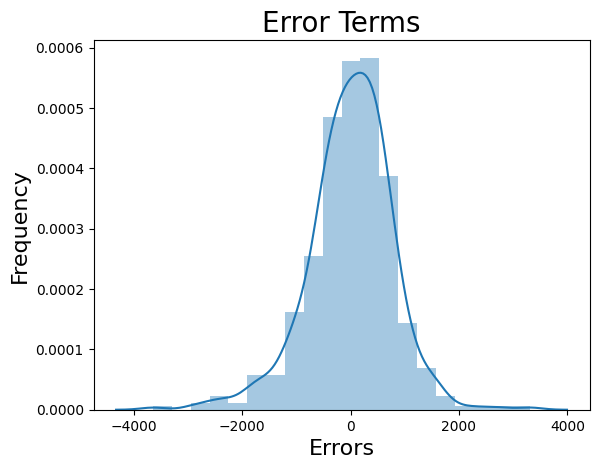

In [630]:

X_train_new = sm.add_constant(X_train_new)

y_train_pred = lm.predict(X_train_new)

sns.distplot((y_train - y_train_pred), bins=20)
plt.title('Error Terms', fontsize=20)
plt.xlabel('Errors', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.show()

#### Making Predictions

In [631]:
# rescaling X_test
X_test[num_vars] = scaler.transform(X_test[num_vars])


In [632]:
# now  create new X_test_new dataframe by droping variable from X_test
X_test_new = X_test[selected_columns]

# Add a constant for the intercept
X_test_new = sm.add_constant(X_test_new)



In [634]:
# making prediction
y_pred = lm.predict(X_test_new)

Text(0.5, 1.0, 'Actual vs. Predicted Values')

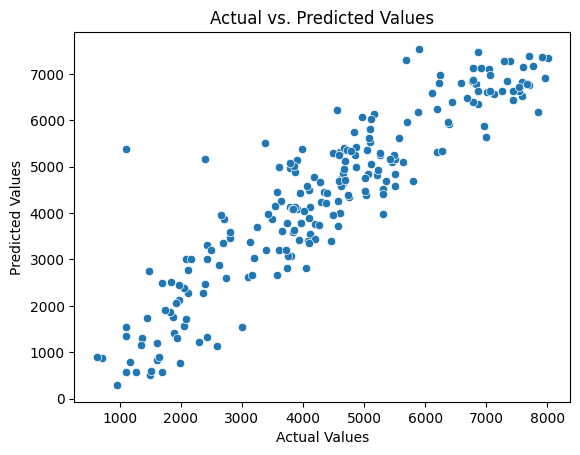

In [635]:
# now model Evaluation

sns.scatterplot(x = y_test, y = y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')

In [638]:
# Calculate and print the R-squared value for the training data
r2_train = r2_score(y_train, y_train_pred)
print(f"R-squared (training data): {r2_train}")

R-squared (training data): 0.8378799747455947


In [636]:
# r squared value
r2_score(y_test, y_pred)

0.8286123262279089